In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('cleaned.csv')
df.head(5)

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,34490.0,67790.0


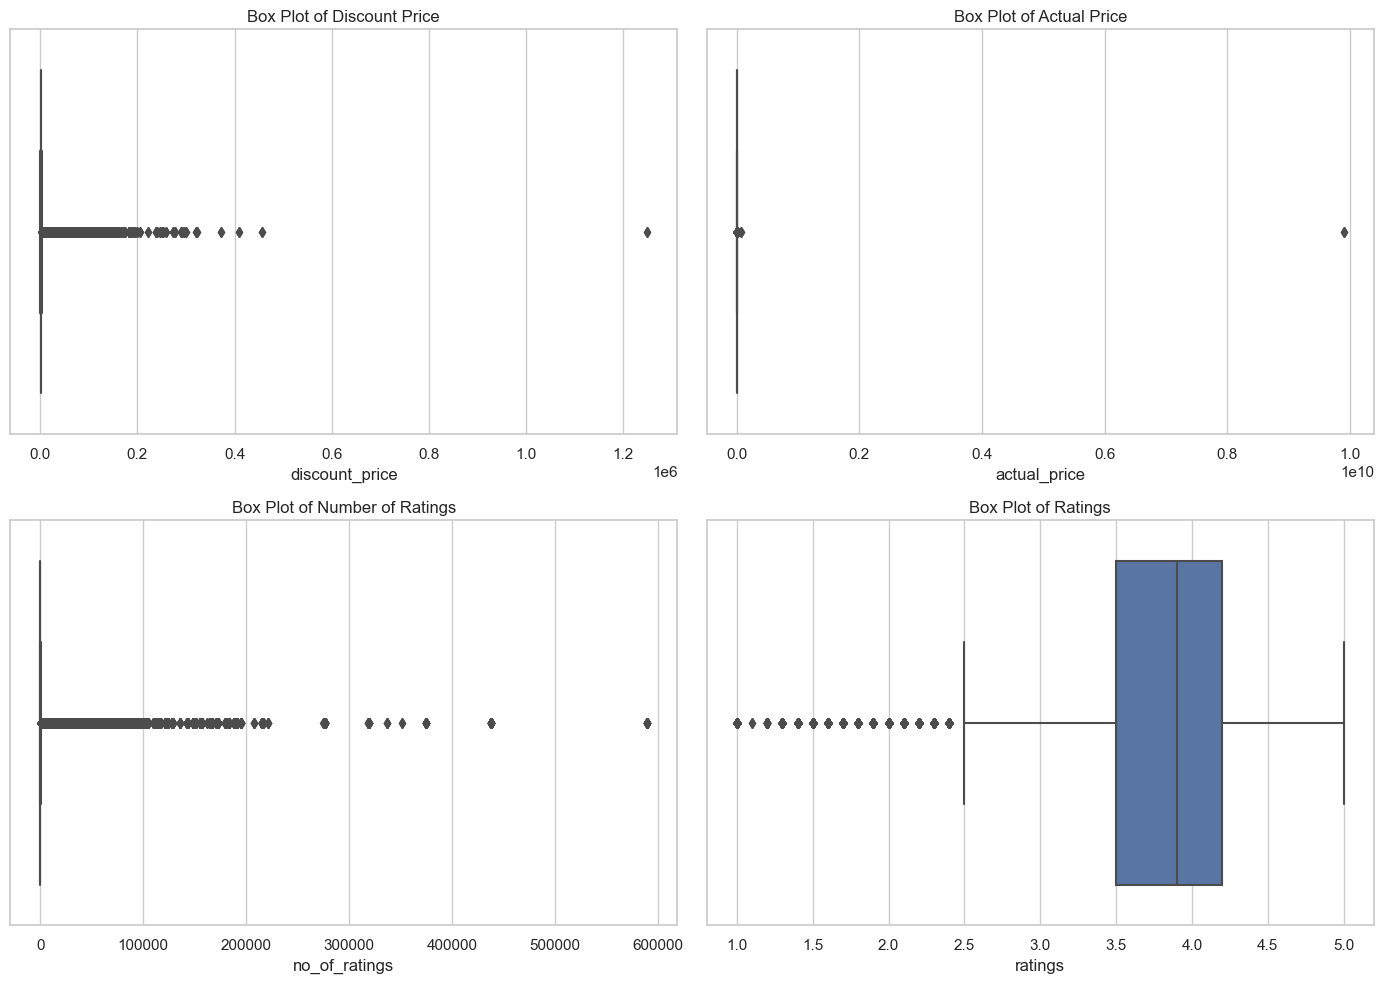

In [6]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plot for discount_price
sns.boxplot(ax=axes[0, 0], x=df['discount_price'])
axes[0, 0].set_title('Box Plot of Discount Price')

# Box plot for actual_price
sns.boxplot(ax=axes[0, 1], x=df['actual_price'])
axes[0, 1].set_title('Box Plot of Actual Price')

# Box plot for no_of_ratings
sns.boxplot(ax=axes[1, 0], x=df['no_of_ratings'])
axes[1, 0].set_title('Box Plot of Number of Ratings')

# Box plot for ratings
sns.boxplot(ax=axes[1, 1], x=df['ratings'])
axes[1, 1].set_title('Box Plot of Ratings')

plt.tight_layout()
plt.show()

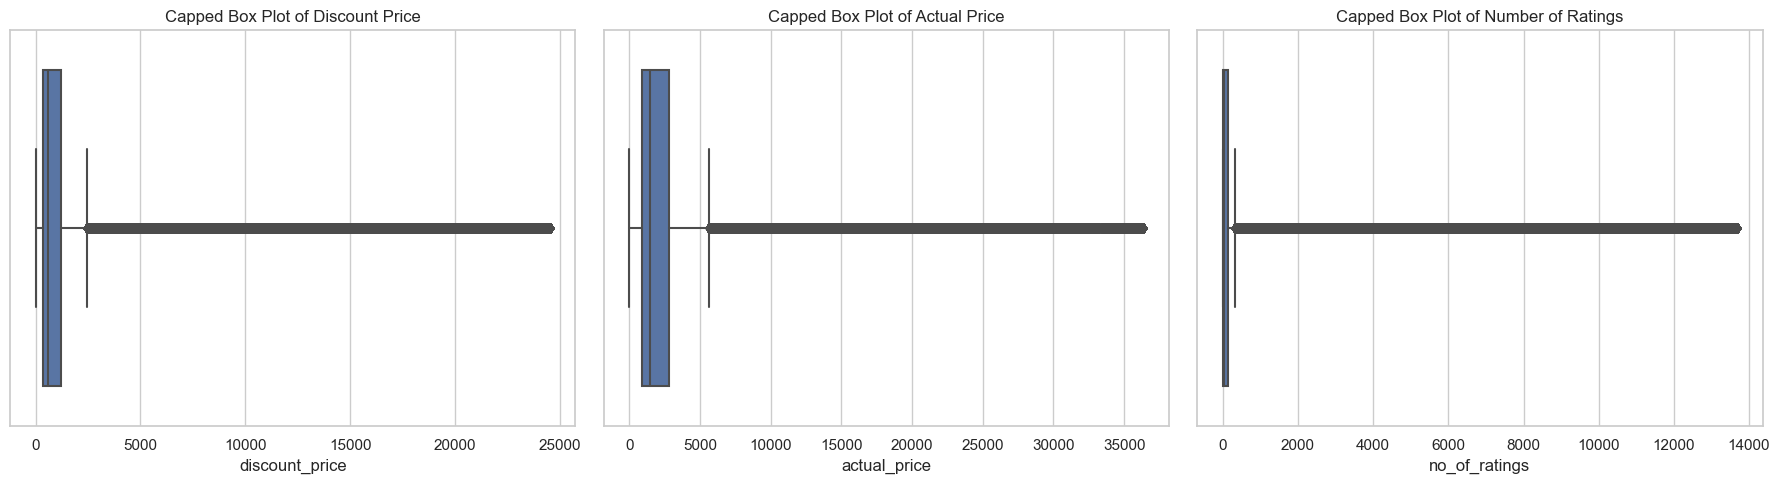

In [7]:
# Calculate the 99th percentile for discount_price, actual_price, and no_of_ratings
percentile_99_discount = df['discount_price'].quantile(0.99)
percentile_99_actual = df['actual_price'].quantile(0.99)
percentile_99_ratings = df['no_of_ratings'].quantile(0.99)

# Cap the values at the 99th percentile
df['discount_price'] = df['discount_price'].clip(upper=percentile_99_discount)
df['actual_price'] = df['actual_price'].clip(upper=percentile_99_actual)
df['no_of_ratings'] = df['no_of_ratings'].clip(upper=percentile_99_ratings)

# Show the effects of capping with new box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(ax=axes[0], x=df['discount_price'])
axes[0].set_title('Capped Box Plot of Discount Price')

sns.boxplot(ax=axes[1], x=df['actual_price'])
axes[1].set_title('Capped Box Plot of Actual Price')

sns.boxplot(ax=axes[2], x=df['no_of_ratings'])
axes[2].set_title('Capped Box Plot of Number of Ratings')

plt.tight_layout()
plt.show()

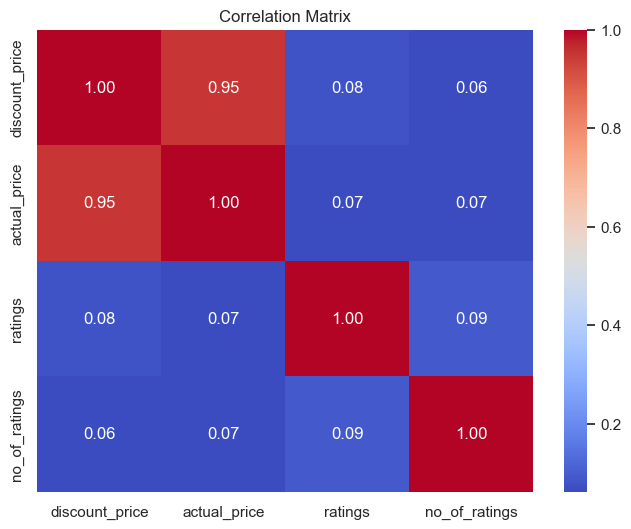

In [8]:
# Compute the correlation matrix
correlation_matrix = df[['discount_price', 'actual_price', 'ratings', 'no_of_ratings']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

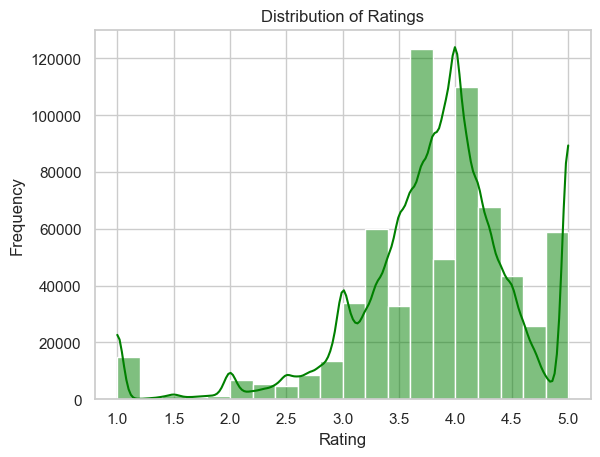

In [9]:
sns.histplot(df['ratings'].dropna(), kde=True, bins=20, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

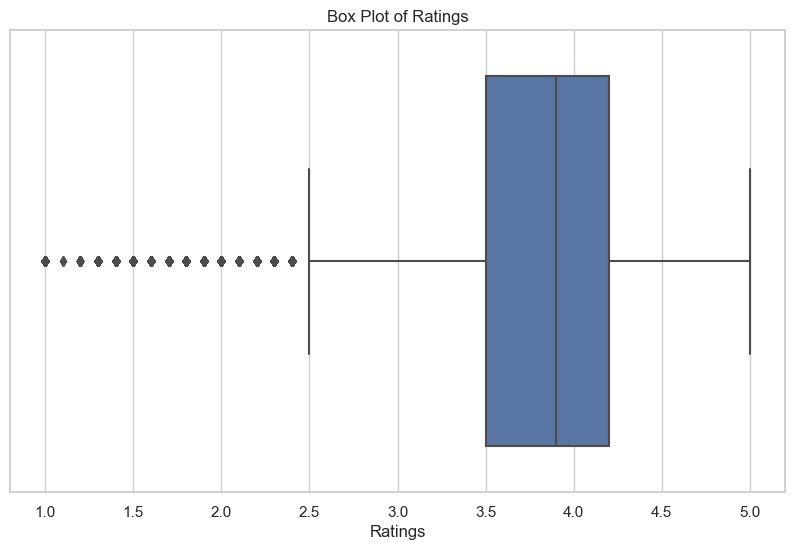

In [10]:
# Box plot of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ratings'])

plt.title('Box Plot of Ratings')
plt.xlabel('Ratings')
plt.show()
